# TP1 - Exploration et transformation des données


In [935]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import time

## Étape 1 : On considère le fichier train_users_2.csv
* Indiquer les points marquants l'exploration.
* Pour chaque observation, indiquer l’opération à effectuer qui serait la plus appropriée.

In [936]:
df = pd.read_csv('train_users_2.csv', index_col=0)

In [937]:
print('\nAffichange du dataset\n')
display(df.head(10))  # Affiche les 10 premières lignes


Affichange du dataset



,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


### Quels sont les descripteurs (colonnes) du dataset?

In [938]:
print("Les descripteurs du dataset")
print(df.columns.tolist())

Les descripteurs du dataset
['date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']


### Combien d'enregistrements (lignes) ont été fournis ?

In [939]:
nombre_enregistrements = df.shape[0]
print("le nombre d'enregistrements:",nombre_enregistrements)

le nombre d'enregistrements: 213451


### Quel est le format des données. Par exemple, dans quel format les dates sont fournies, existe-t-il des valeurs numériques, à quoi ressemblent les différentes valeurs catégorielles ?

In [940]:
print(df.info())  # Vérifie les types de données et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
Index: 213451 entries, gxn3p5htnn to nw9fwlyb5f
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 

<span> Les données de types date: 'date_account_created', 'timestamp_first_active', 'date_first_booking'</span></br>
<span> Les données de types numériques: 'age', 'signup_flow'</span></br>
<span> Les données de types categorielles: 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'</span>

In [941]:
cols = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 
            'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
                'first_device_type', 'first_browser']

print('\nAffichage des valeurs uniques pour chaque colonne\n')
for col in cols:
    print(col,':', df[col].unique(), '\n')
 


Affichage des valeurs uniques pour chaque colonne

gender : ['-unknown-' 'MALE' 'FEMALE' 'OTHER'] 

signup_method : ['facebook' 'basic' 'google'] 

signup_flow : [ 0  3  2  1 24  8  6  5 10 25 12  4 16 15 20 21 23] 

language : ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is'] 

affiliate_channel : ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api'] 

affiliate_provider : ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum'] 

first_affiliate_tracked : ['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops'] 

signup_app : ['Web' 'Moweb' 'iOS' 'Android'] 

first_device_type : ['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)'] 

first_bro

### Y a-t-il des valeurs manquantes?

In [942]:
print("Valeurs manquantes par colonne:\n")
print(df.isnull().sum())  # Compte les valeurs manquantes par colonne

Valeurs manquantes par colonne:

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


### Est-ce qu’il y’a des dépendances évidentes au niveau des descripteurs?

#### Corrélations entre variables qualitatives

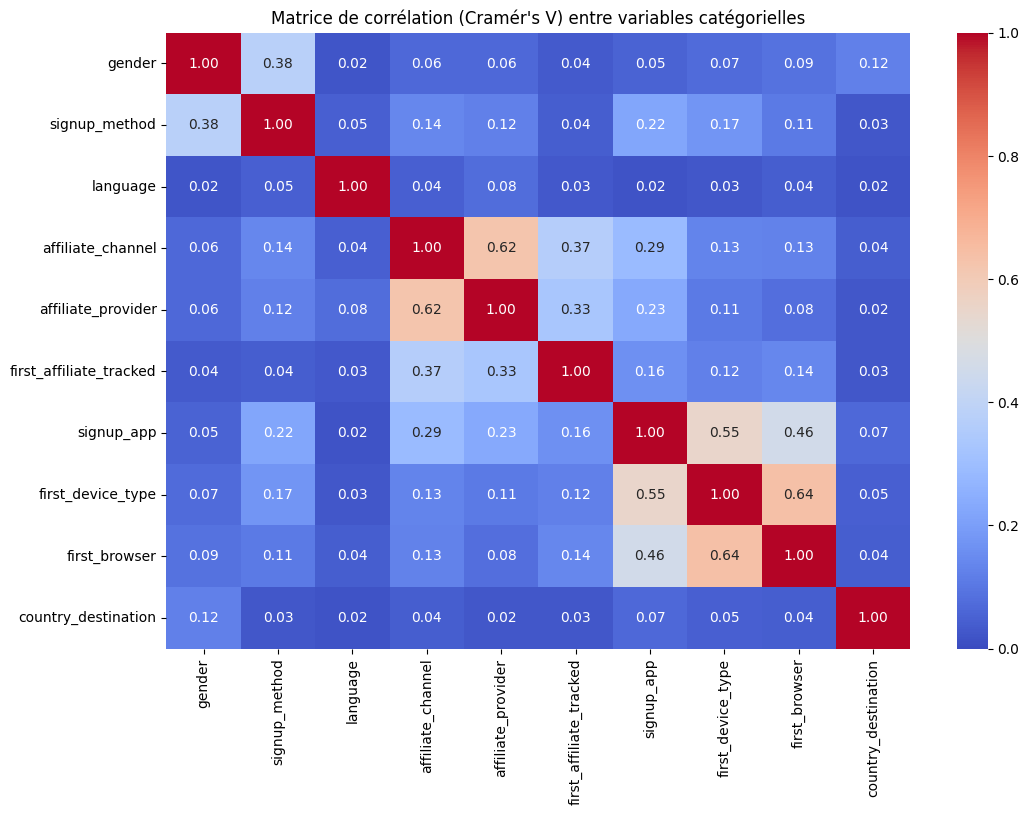

In [943]:
# Sélectionner les colonnes catégorielles
categorical_columns = [
    'gender', 'signup_method', 'language', 'affiliate_channel',
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
    'first_device_type', 'first_browser', 'country_destination'
]

# Fonction pour calculer le coefficient de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Créer une matrice de corrélation
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Remplir la matrice avec les coefficients de Cramér
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir la matrice en valeurs numériques
correlation_matrix = correlation_matrix.astype(float)

# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title("Matrice de corrélation (Cramér's V) entre variables catégorielles")
plt.show()

#### Corrélations entre variables numériques

Nombre de cas où `timestamp_first_active` est postérieur à `date_account_created` : 213273


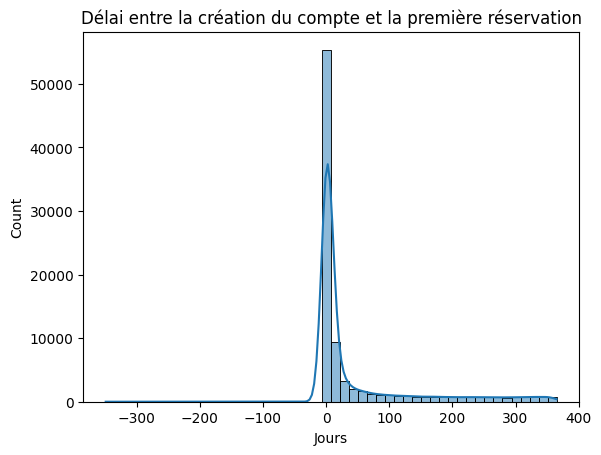

Dataset avec dates converties:



,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_issue,booking_delay
id,,,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,False,NaN
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,False,NaN
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,False,-57.0
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,False,278.0
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,False,-208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,True,NaN
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,True,NaN
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,True,NaN


In [944]:
df_original = df.copy()  
# Vérifier les dépendances temporelles
# Vérifier que les timestamps sont bien ordonnés
df["date_account_created"] = pd.to_datetime(df["date_account_created"]) #Convesion de la colonne "date_account_created" en datet

# Conversion de la colonne 'date_account_created' en datetime si ce n'est pas déjà fait
df["timestamp_first_active"] = pd.to_datetime(df["timestamp_first_active"], format='%Y%m%d%H%M%S')
df["date_first_booking"] = pd.to_datetime(df["date_first_booking"])

# Vérifier si `timestamp_first_active` est toujours avant ou égal à `date_account_created`
df["timestamp_issue"] = df["timestamp_first_active"] > df["date_account_created"]
print("Nombre de cas où `timestamp_first_active` est postérieur à `date_account_created` :", df["timestamp_issue"].sum())

# Visualiser l'écart entre `date_account_created` et `date_first_booking`
df["booking_delay"] = (df["date_first_booking"] - df["date_account_created"]).dt.days
sns.histplot(df["booking_delay"].dropna(), bins=50, kde=True)
plt.title("Délai entre la création du compte et la première réservation")
plt.xlabel("Jours")
plt.show()

print('Dataset avec dates converties:\n')
display(df)
#Interprétation :
#Si timestamp_first_active est après date_account_created, il y a un problème dans les données.
#La distribution des délais de réservation permet de voir combien de temps les utilisateurs attendent avant leur première réservation.

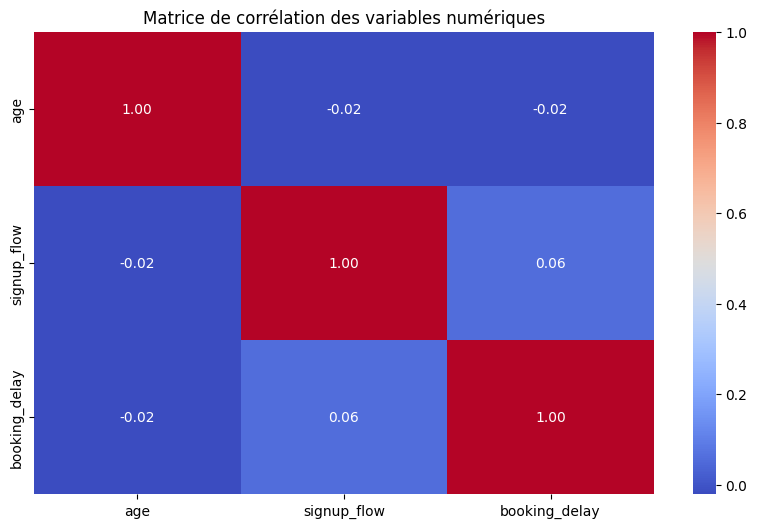

In [945]:
df_numeric = df.select_dtypes(include=[np.number])

correlation_numeriques = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_numeriques, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

id
820tgsjxq7    38.0
4ft3gnwmtx    56.0
bjjt8pjhuk    42.0
87mebub9p4    41.0
lsw9q7uk0j    46.0
              ... 
omlc9iku7t    34.0
0k26r3mir0    36.0
qbxza0xojf    23.0
zxodksqpep    32.0
6o3arsjbb4    32.0
Name: age, Length: 122932, dtype: float64

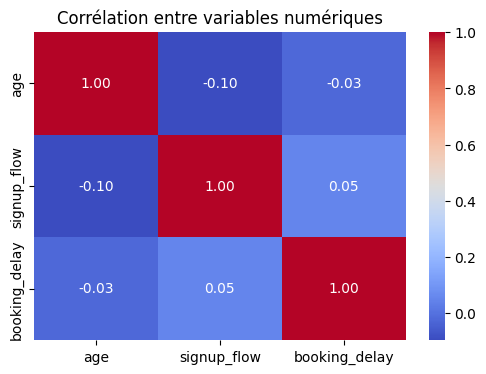

In [946]:

# Convertir l'âge en numérique et traiter les valeurs aberrantes
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df_FilteredAge = df[(df["age"] > 17) & (df["age"] < 100)]  # Filtrer des âges aberrants
display(df_FilteredAge['age'])

# Matrice de corrélation
num_vars = ["age", "signup_flow", "booking_delay"]
corr_matrix = df_FilteredAge[num_vars].corr()

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre variables numériques")
plt.show()

#Interprétation :
#Vérifiez si l'âge influence le temps avant la première réservation.
#Si une forte corrélation existe, l'âge pourrait être une variable clé pour prédire la destination.

### D’autres observations sur le dataset qui pourraient être pertinentes ?

In [947]:
print(df.describe())

                date_account_created         timestamp_first_active  \
count                         213451                         213451   
mean   2013-06-25 09:05:01.103297792  2013-06-25 16:15:47.473734144   
min              2010-01-01 00:00:00            2009-03-19 04:32:55   
25%              2012-12-26 00:00:00     2012-12-25 07:33:27.500000   
50%              2013-09-11 00:00:00            2013-09-11 06:13:08   
75%              2014-03-06 00:00:00            2014-03-06 08:25:14   
max              2014-06-30 00:00:00            2014-06-30 23:58:24   
std                              NaN                            NaN   

                  date_first_booking            age    signup_flow  \
count                          88908  125461.000000  213451.000000   
mean   2013-07-04 17:44:26.108786176      49.668335       3.267387   
min              2010-01-02 00:00:00       1.000000       0.000000   
25%              2012-12-02 00:00:00      28.000000       0.000000   
50%       

#### Boxplot de l'âge en fonction du pays de destination

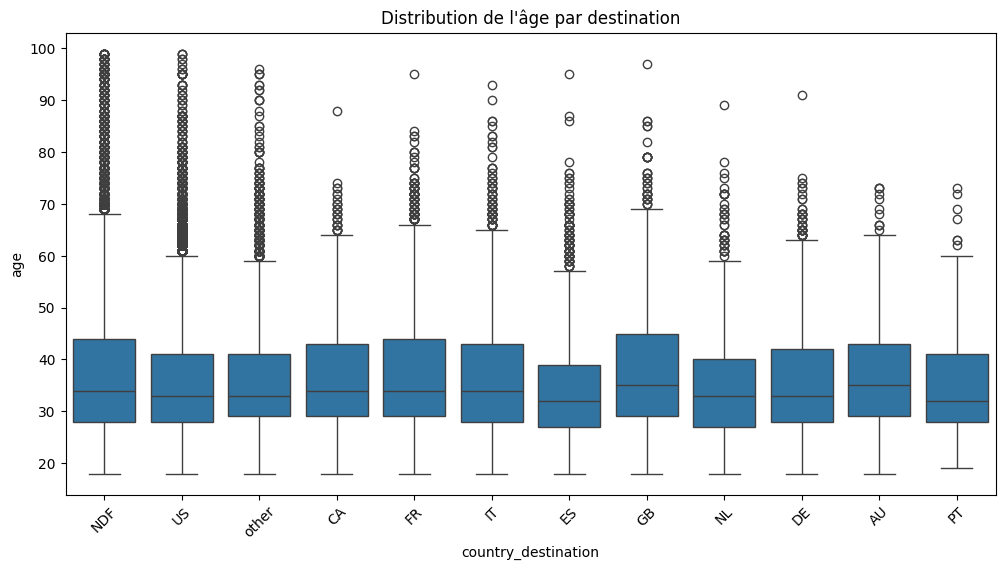

In [948]:
#L'âge semble être la seule variable continue intéressante pour un boxplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x="country_destination", y="age", data=df_FilteredAge)
plt.xticks(rotation=45)
plt.title("Distribution de l'âge par destination")
plt.show()

#### Boxplot de l'âge selon le sexe :

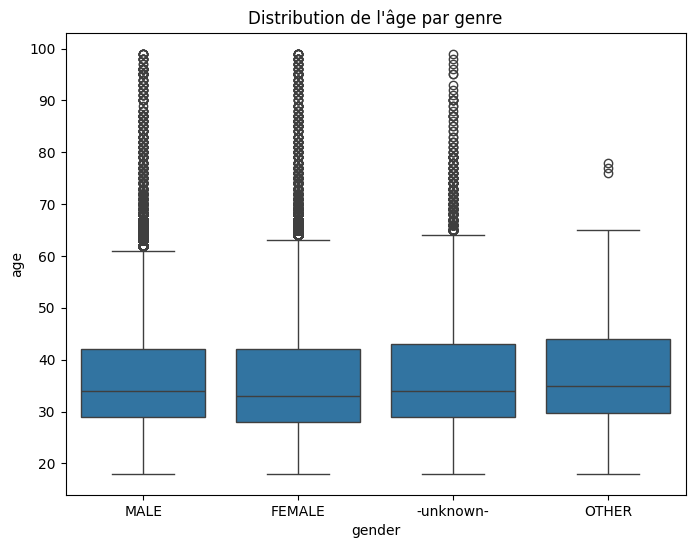

In [949]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="gender", y="age", data=df_FilteredAge)
plt.title("Distribution de l'âge par genre")
plt.show()

#### Boxplot de l'âge selon le canal d'affiliation :

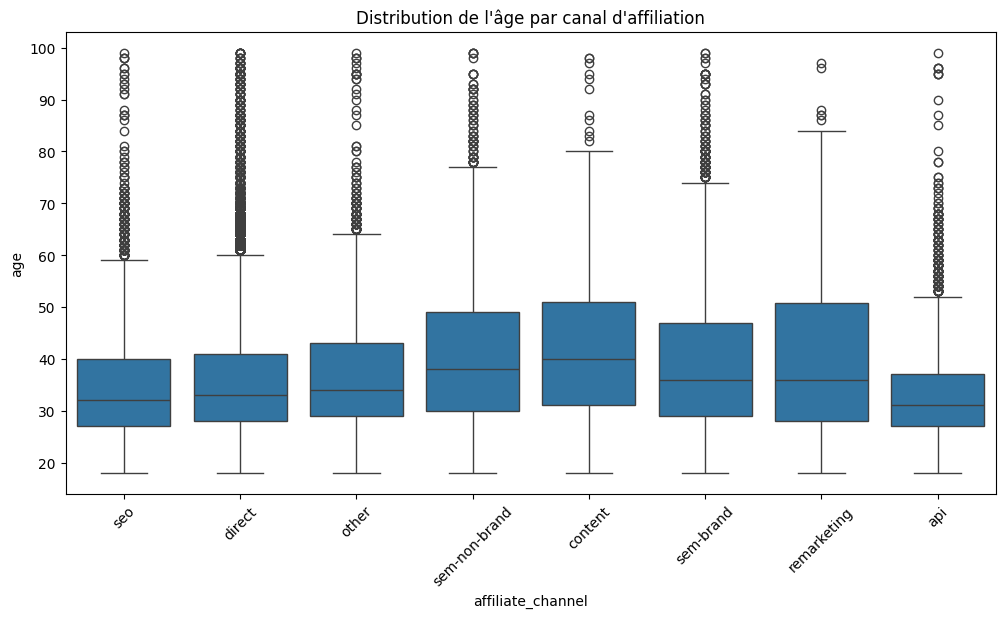

In [950]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="affiliate_channel", y="age", data=df_FilteredAge)
plt.xticks(rotation=45)
plt.title("Distribution de l'âge par canal d'affiliation")
plt.show()

#### Détection des valeurs aberrantes de l'âge (outliers)

In [951]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
display(outliers[['age']])  # Liste des outliers

,age
id,
dgatsm5ocq,69.0
3qsa4lo7eg,5.0
47wdhtdini,72.0
uhbkw5exeg,70.0
kw7qyvlhsq,70.0
...,...
pw9nfo1ulb,95.0
y37l7vzjpa,66.0
jl5f10hu4t,69.0


#### Relations entre variables catégorielles

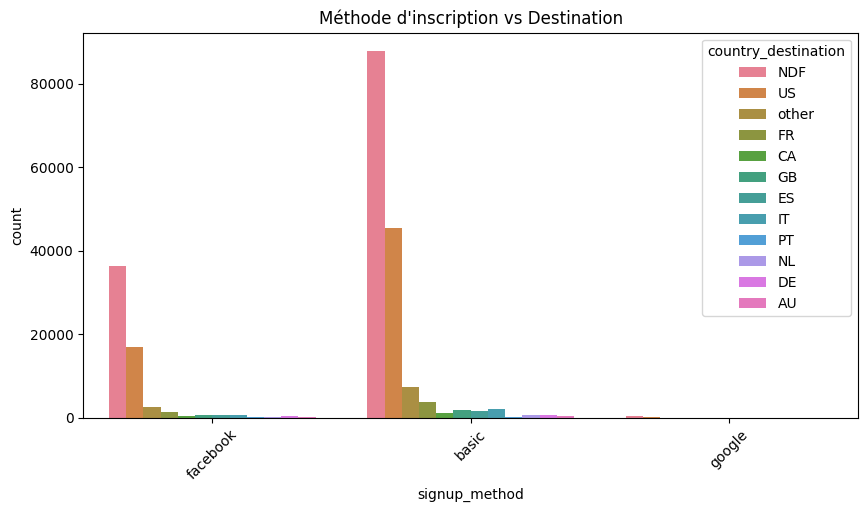

In [952]:
#Impact de signup_method sur country_destination
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="signup_method", hue="country_destination")
plt.title("Méthode d'inscription vs Destination")
plt.xticks(rotation=45)
plt.show()

#Interprétation :
#Certains modes d'inscription sont peut-être plus populaires pour certaines destinations.
#Par exemple, les utilisateurs inscrits via Google ou Facebook peuvent être différents de ceux inscrits par email.

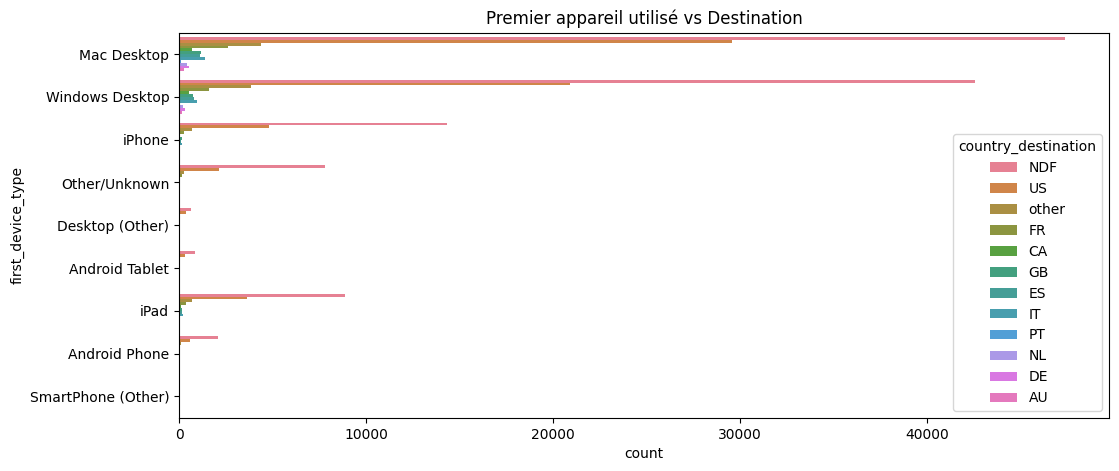

In [953]:
#Influence de first_device_type sur country_destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="first_device_type", hue="country_destination")
plt.title("Premier appareil utilisé vs Destination")
plt.show()

#Interprétation :
#Les utilisateurs mobiles (iPhone, Android) réservent-ils plus rapidement que ceux sur ordinateur ?

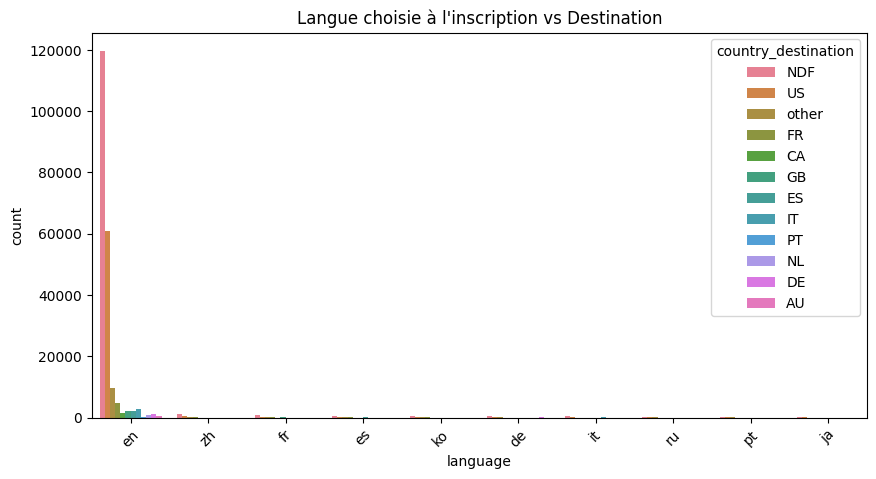

In [954]:
#Langue (language) et destination
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="language", hue="country_destination", order=df["language"].value_counts().index[:10])
plt.title("Langue choisie à l'inscription vs Destination")
plt.xticks(rotation=45)
plt.show()

#Interprétation :
#La langue d'inscription influence-t-elle la destination finale ?
#Ex : Les utilisateurs en français réservent-ils plus souvent en France ?

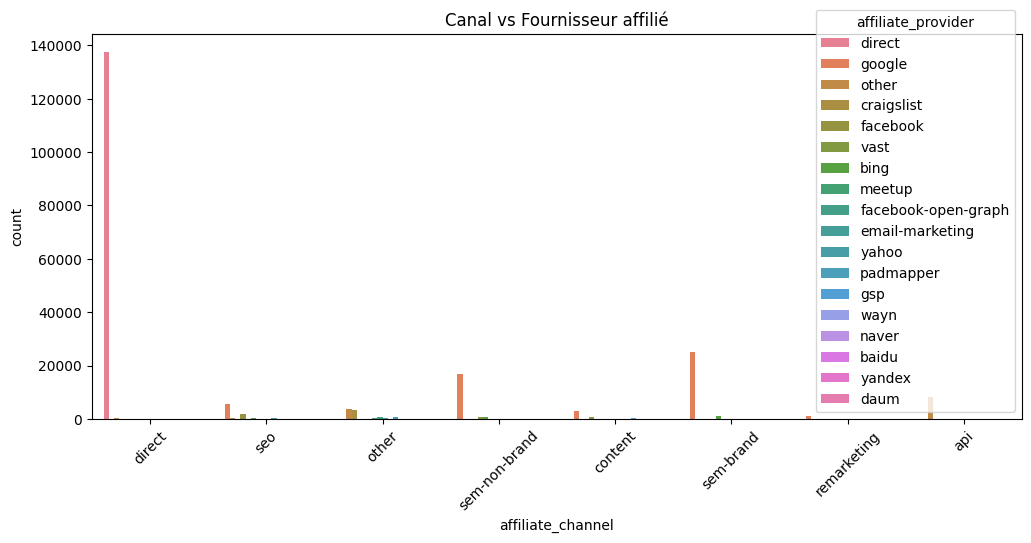

In [955]:
# Vérifier les relations entre affiliés
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="affiliate_channel", hue="affiliate_provider")
plt.title("Canal vs Fournisseur affilié")
plt.xticks(rotation=45)
plt.show()

#Interprétation :
#Certains fournisseurs affiliés sont spécialisés dans certains canaux de conversion.

In [956]:
#Résumé des dépendances explorées :
#Dépendances temporelles (timestamp_first_active, date_account_created, date_first_booking)
#✔ Corrélations entre variables numériques (âge, délai de réservation)
#✔ Influence des méthodes d'inscription, des appareils et de la langue sur la destination
#✔ Relation entre les affiliés et leur impact sur les inscriptions

## Étape 2 : On considère le fichier train_users_2.csv et test_users.csv
* Implémenter les correctifs soulignés dans l’étape 1.

In [957]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = df_original.copy()

df_test = pd.read_csv('test_users.csv', index_col=0)
print("Données de Test:")
display(df_test)

Données de Test:


,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,,
5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


In [958]:
#verifier les doublons
print("Doublons dans les doneées de train:", df.duplicated().unique())
print("Doublons dans les doneées de test:", df_test.duplicated().unique())

Doublons dans les doneées de train: [False]
Doublons dans les doneées de test: [False]


### Conversion de type/format (les dates)

#####  * Train

In [959]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df.drop(['date_first_booking'], axis=1, inplace=True)
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')

display(df)


,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


##### * Test

In [960]:
df_test['date_account_created'] = pd.to_datetime(df_test['date_account_created'])
df_test.drop(['date_first_booking'], axis=1, inplace=True)
df_test['timestamp_first_active'] = pd.to_datetime(df_test['timestamp_first_active'], format='%Y%m%d%H%M%S')

display(df_test)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,
5uwns89zht,2014-07-01,2014-07-01 00:00:06,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,2014-09-30 23:53:06,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,2014-09-30 23:54:08,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


### Remplacement de valeurs manquantes

##### * Train

In [961]:
age_data = df[df['age'].notnull()]
age_target = age_data['age']
age_features = age_data.drop(['age'], axis=1).select_dtypes(include=[np.number])

age_model = RandomForestRegressor()
age_model.fit(age_features, age_target)

# Prédire les valeurs manquantes dans 'age'
missing_age_data = df[df['age'].isnull()]
predicted_ages = age_model.predict(missing_age_data.drop(['age'], axis=1).select_dtypes(include=[np.number]))
df.loc[df['age'].isnull(), 'age'] = predicted_ages


In [962]:
# c. Remplacement de first_affiliate_tracked avec la médiane

# *** explorer les valeurs de first_affiliate_tracked les plus frequentes ou re-utiliser le random forest
df['first_affiliate_tracked'].fillna(df['first_affiliate_tracked'].mode()[0], inplace=True)

/var/folders/dz/dt7pkrls1kxg9y931v65tmz40000gn/T/ipykernel_13424/3114695332.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_affiliate_tracked'].fillna(df['first_affiliate_tracked'].mode()[0], inplace=True)


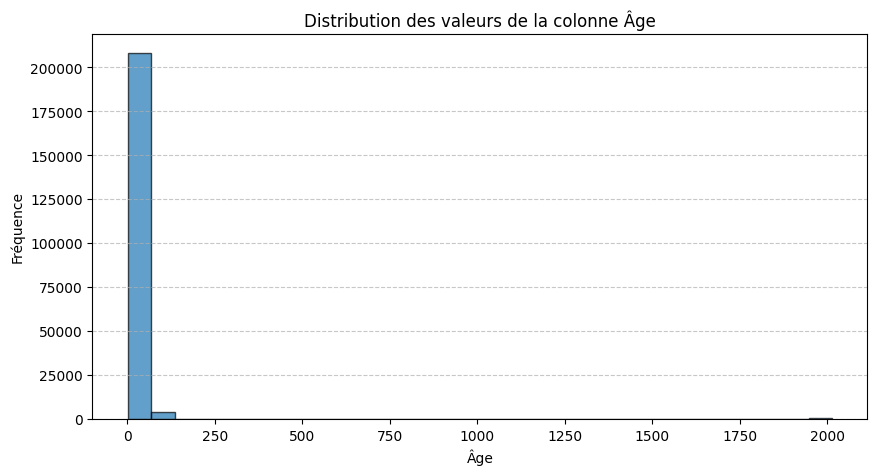

In [963]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [964]:
# 3. Correction/Suppression de valeurs aberrantes/erronées
df = df[(df['age'] >= 15) & (df['age'] <= 120)]  # Suppression des âges aberrants
df['age'] = df['age'].astype(int)

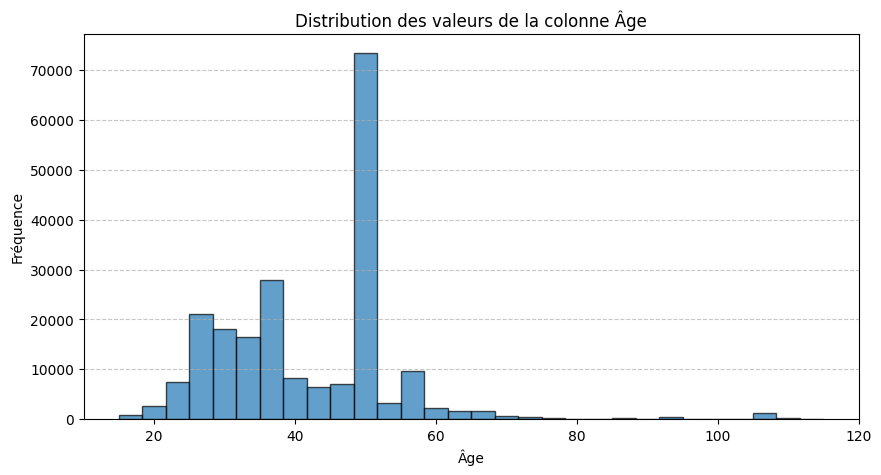

In [965]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [966]:

display(df)


,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,50,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,MALE,32,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,-unknown-,50,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,-unknown-,32,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


##### * Test

In [967]:
print(df_test.describe())
print("Valeurs manquantes par colonne:\n")
print(df_test.isnull().sum())  # Compte les valeurs manquantes par colonne

                date_account_created         timestamp_first_active  \
count                          62096                          62096   
mean   2014-08-14 19:24:31.631022848  2014-08-15 07:57:04.415598080   
min              2014-07-01 00:00:00            2014-07-01 00:00:06   
25%              2014-07-24 00:00:00     2014-07-24 00:04:38.500000   
50%              2014-08-14 00:00:00            2014-08-14 02:36:11   
75%              2014-09-05 00:00:00            2014-09-05 22:39:30   
max              2014-09-30 00:00:00            2014-09-30 23:59:01   
std                              NaN                            NaN   

                age   signup_flow  
count  33220.000000  62096.000000  
mean      37.616677      7.813885  
min        1.000000      0.000000  
25%       26.000000      0.000000  
50%       31.000000      0.000000  
75%       40.000000     23.000000  
max     2002.000000     25.000000  
std       74.440647     11.254291  
Valeurs manquantes par colonne:

dat

In [968]:
age_data = df_test[df_test['age'].notnull()]
age_target = age_data['age']
age_features = age_data.drop(['age'], axis=1).select_dtypes(include=[np.number])

age_model = RandomForestRegressor()
age_model.fit(age_features, age_target)

# Prédire les valeurs manquantes dans 'age'
missing_age_data = df_test[df_test['age'].isnull()]
predicted_ages = age_model.predict(missing_age_data.drop(['age'], axis=1).select_dtypes(include=[np.number]))
df_test.loc[df_test['age'].isnull(), 'age'] = predicted_ages

In [969]:
# c. Remplacement de first_affiliate_tracked avec la médiane

df_test['first_affiliate_tracked'].fillna(df_test['first_affiliate_tracked'].mode()[0], inplace=True)

/var/folders/dz/dt7pkrls1kxg9y931v65tmz40000gn/T/ipykernel_13424/961816202.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['first_affiliate_tracked'].fillna(df_test['first_affiliate_tracked'].mode()[0], inplace=True)


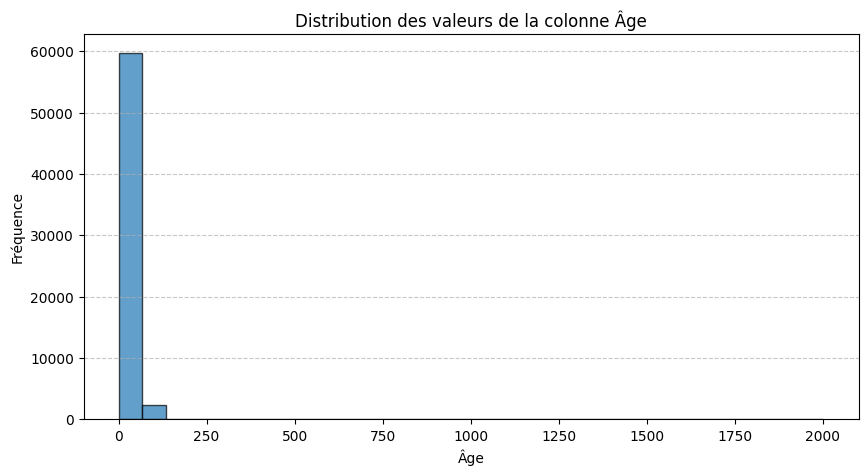

In [970]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df_test['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [971]:
# 3. Correction/Suppression de valeurs aberrantes/erronées
df_test = df_test[(df_test['age'] >= 15) & (df_test['age'] <= 120)]  # Suppression des âges aberrants
df_test['age'] = df_test['age'].astype(int)

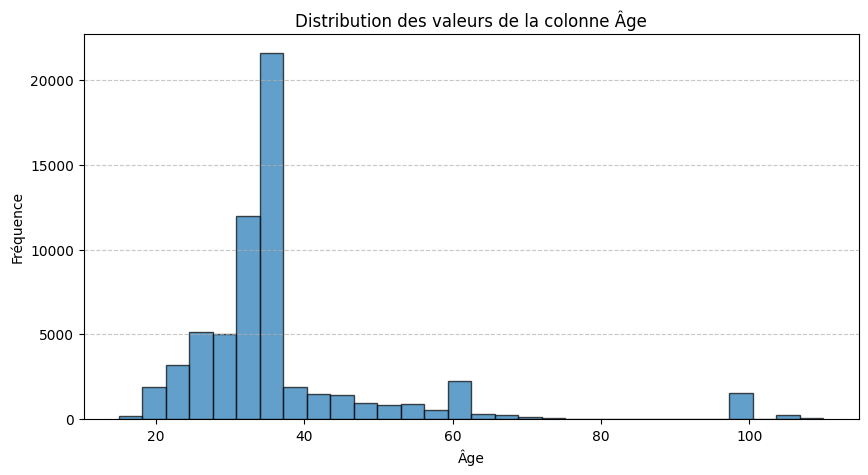

In [972]:
# Afficher la distribution des valeurs de la colonne 'age'
plt.figure(figsize=(10, 5))
plt.hist(df_test['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des valeurs de la colonne Âge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [973]:
display(df_test)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,
5uwns89zht,2014-07-01,2014-07-01 00:00:06,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,-unknown-,36,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,-unknown-,36,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,-unknown-,36,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,-unknown-,36,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,-unknown-,31,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,2014-09-30 23:53:06,-unknown-,61,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,2014-09-30 23:54:08,-unknown-,36,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


##### * Train

In [974]:

# données qualittatives: remplacer les  -unknown- par la valeur la plus fréquentes


colonnes_qualitatives = df.select_dtypes(include=['object']).columns

# Remplacer les valeurs '-unknown-' par la modet
for col in colonnes_qualitatives:
    nombre_unknown_gender = df[col].value_counts().get('-unknown-', 0)
    mode_value = df[col].mode()[0]
    print (col, ":", nombre_unknown_gender, ":", mode_value)

mode_value = df["first_browser"].mode()[0]
df["first_browser"] = df["first_browser"].replace('-unknown-', mode_value)


gender : 95611 : -unknown-
signup_method : 0 : basic
language : 0 : en
affiliate_channel : 0 : direct
affiliate_provider : 0 : direct
first_affiliate_tracked : 0 : untracked
signup_app : 0 : Web
first_device_type : 0 : Mac Desktop
first_browser : 27179 : Chrome
country_destination : 0 : NDF


##### * Test

In [975]:
colonnes_qualitatives_test = df_test.select_dtypes(include=['object']).columns
print(colonnes_qualitatives_test)

# Remplacer les valeurs '-unknown-' par la modet
for col in colonnes_qualitatives_test:
    nombre_unknown_gender = df_test[col].value_counts().get('-unknown-', 0)
    mode_value = df_test[col].mode()[0]
    print (col, ":", nombre_unknown_gender, ":", mode_value)


mode_value = df_test["first_browser"].mode()[0]
df_test["first_browser"] = df_test["first_browser"].replace('-unknown-', mode_value)


Index(['gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')
gender : 33789 : -unknown-
signup_method : 0 : basic
language : 1 : en
affiliate_channel : 0 : direct
affiliate_provider : 0 : direct
first_affiliate_tracked : 0 : untracked
signup_app : 0 : Web
first_device_type : 0 : iPhone
first_browser : 17090 : -unknown-


In [976]:
display(df_test)

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,,,,,
5uwns89zht,2014-07-01,2014-07-01 00:00:06,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,-unknown-,36,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,-unknown-,36,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,-unknown-,36,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,-unknown-,36,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,-unknown-,31,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,2014-09-30,2014-09-30 23:53:06,-unknown-,61,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,2014-09-30,2014-09-30 23:54:08,-unknown-,36,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox


### Standardisation

##### * Train

In [977]:
import pandas as pd

df_qualitatives = df.select_dtypes(include=['object'])
df_quantitatives = df.select_dtypes(include=[np.number])
df_dates = df.select_dtypes(include=['datetime64'])
df_target = df['country_destination']

display(df_qualitatives)
display(df_quantitatives)
display(df_dates)
display(df_target)






,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,
gxn3p5htnn,-unknown-,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,MALE,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,MALE,basic,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
mhewnxesx9,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
6o3arsjbb4,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF


,age,signup_flow
id,,
gxn3p5htnn,50,0
820tgsjxq7,38,0
4ft3gnwmtx,56,3
bjjt8pjhuk,42,0
87mebub9p4,41,0
...,...,...
zxodksqpep,32,0
mhewnxesx9,50,0
6o3arsjbb4,32,0


,date_account_created,timestamp_first_active
id,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55
820tgsjxq7,2011-05-25,2009-05-23 17:48:09
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29
87mebub9p4,2010-09-14,2009-12-08 06:11:05
...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36
mhewnxesx9,2014-06-30,2014-06-30 23:57:19
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54


id
gxn3p5htnn      NDF
820tgsjxq7      NDF
4ft3gnwmtx       US
bjjt8pjhuk    other
87mebub9p4       US
              ...  
zxodksqpep      NDF
mhewnxesx9      NDF
6o3arsjbb4      NDF
jh95kwisub      NDF
nw9fwlyb5f      NDF
Name: country_destination, Length: 212613, dtype: object

In [978]:
from sklearn.preprocessing import OneHotEncoder

df_qualitatives = df_qualitatives.drop(['country_destination'], axis=1)
colonnes_qualitatives = df_qualitatives.select_dtypes(include=['object']).columns


encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_qualitatives[colonnes_qualitatives]).toarray()

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(colonnes_qualitatives))
print(df_encoded)

p_k = np.mean(df_encoded.values,axis=0)
print(p_k)


ZD = df_encoded.values/np.sqrt(p_k)
display(ZD.round(3))

df_encoded = pd.DataFrame(ZD, columns=encoder.get_feature_names_out(colonnes_qualitatives), index=df.index)
print(df_encoded)

        gender_-unknown-  gender_FEMALE  gender_MALE  gender_OTHER  \
0                    1.0            0.0          0.0           0.0   
1                    0.0            0.0          1.0           0.0   
2                    0.0            1.0          0.0           0.0   
3                    0.0            1.0          0.0           0.0   
4                    1.0            0.0          0.0           0.0   
...                  ...            ...          ...           ...   
212608               0.0            0.0          1.0           0.0   
212609               1.0            0.0          0.0           0.0   
212610               1.0            0.0          0.0           0.0   
212611               1.0            0.0          0.0           0.0   
212612               1.0            0.0          0.0           0.0   

        signup_method_basic  signup_method_facebook  signup_method_google  \
0                       0.0                     1.0                   0.0   
1    

array([[1.491, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.981, ..., 0.   , 0.   , 0.   ],
       [0.   , 1.844, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [1.491, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.491, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.491, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

            gender_-unknown-  gender_FEMALE  gender_MALE  gender_OTHER  \
id                                                                       
gxn3p5htnn          1.491217       0.000000     0.000000           0.0   
820tgsjxq7          0.000000       0.000000     1.981087           0.0   
4ft3gnwmtx          0.000000       1.843662     0.000000           0.0   
bjjt8pjhuk          0.000000       1.843662     0.000000           0.0   
87mebub9p4          1.491217       0.000000     0.000000           0.0   
...                      ...            ...          ...           ...   
zxodksqpep          0.000000       0.000000     1.981087           0.0   
mhewnxesx9          1.491217       0.000000     0.000000           0.0   
6o3arsjbb4          1.491217       0.000000     0.000000           0.0   
jh95kwisub          1.491217       0.000000     0.000000           0.0   
nw9fwlyb5f          1.491217       0.000000     0.000000           0.0   

            signup_method_basic  sign

In [979]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df_quantitatives), columns=df_quantitatives.columns)


df_scaled = (df_quantitatives.values-np.mean(df_quantitatives.values,axis=0))/np.std(df_quantitatives.values,axis=0)
df_scaled = pd.DataFrame(df_scaled, columns=df_quantitatives.columns, index=df.index)
display(df_scaled)

,age,signup_flow
id,,
gxn3p5htnn,0.615494,-0.428185
820tgsjxq7,-0.332015,-0.428185
4ft3gnwmtx,1.089249,-0.035788
bjjt8pjhuk,-0.016179,-0.428185
87mebub9p4,-0.095138,-0.428185
...,...,...
zxodksqpep,-0.805769,-0.428185
mhewnxesx9,0.615494,-0.428185
6o3arsjbb4,-0.805769,-0.428185


In [980]:
train = pd.concat([df_dates, df_scaled, df_encoded], axis=1)

##### * Test

In [981]:
df_qualitatives = df_test.select_dtypes(include=['object'])
df_quantitatives = df_test.select_dtypes(include=[np.number])
df_dates = df_test.select_dtypes(include=['datetime64'])

display(df_qualitatives)
display(df_quantitatives)
display(df_dates)


,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
id,,,,,,,,,
5uwns89zht,FEMALE,facebook,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,-unknown-,basic,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,-unknown-,basic,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,-unknown-,basic,en,direct,direct,untracked,Web,Windows Desktop,IE
zp8xfonng8,-unknown-,basic,ko,direct,direct,untracked,Android,Android Phone,-unknown-
fa6260ziny,-unknown-,basic,de,direct,direct,linked,Web,Windows Desktop,Firefox


,age,signup_flow
id,,
5uwns89zht,35,0
jtl0dijy2j,36,0
xx0ulgorjt,36,0
6c6puo6ix0,36,0
czqhjk3yfe,36,0
...,...,...
cv0na2lf5a,31,0
zp8xfonng8,61,23
fa6260ziny,36,0


,date_account_created,timestamp_first_active
id,,
5uwns89zht,2014-07-01,2014-07-01 00:00:06
jtl0dijy2j,2014-07-01,2014-07-01 00:00:51
xx0ulgorjt,2014-07-01,2014-07-01 00:01:48
6c6puo6ix0,2014-07-01,2014-07-01 00:02:15
czqhjk3yfe,2014-07-01,2014-07-01 00:03:05
...,...,...
cv0na2lf5a,2014-09-30,2014-09-30 23:52:32
zp8xfonng8,2014-09-30,2014-09-30 23:53:06
fa6260ziny,2014-09-30,2014-09-30 23:54:08


In [982]:
colonnes_qualitatives = df_qualitatives.select_dtypes(include=['object']).columns


encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_qualitatives[colonnes_qualitatives]).toarray()

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(colonnes_qualitatives))
print(df_encoded)

p_k = np.mean(df_encoded.values,axis=0)
print(p_k)


ZD = df_encoded.values/np.sqrt(p_k)
display(ZD.round(3))

df_encoded = pd.DataFrame(ZD, columns=encoder.get_feature_names_out(colonnes_qualitatives), index=df_test.index)
print(df_encoded)

       gender_-unknown-  gender_FEMALE  gender_MALE  gender_OTHER  \
0                   0.0            1.0          0.0           0.0   
1                   1.0            0.0          0.0           0.0   
2                   1.0            0.0          0.0           0.0   
3                   1.0            0.0          0.0           0.0   
4                   1.0            0.0          0.0           0.0   
...                 ...            ...          ...           ...   
62040               1.0            0.0          0.0           0.0   
62041               1.0            0.0          0.0           0.0   
62042               1.0            0.0          0.0           0.0   
62043               1.0            0.0          0.0           0.0   
62044               0.0            1.0          0.0           0.0   

       signup_method_basic  signup_method_facebook  signup_method_google  \
0                      0.0                     1.0                   0.0   
1                  

array([[0.   , 2.071, 0.   , ..., 0.   , 0.   , 0.   ],
       [1.355, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.355, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [1.355, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [1.355, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 2.071, 0.   , ..., 0.   , 0.   , 0.   ]])

            gender_-unknown-  gender_FEMALE  gender_MALE  gender_OTHER  \
id                                                                       
5uwns89zht          0.000000       2.071425          0.0           0.0   
jtl0dijy2j          1.355082       0.000000          0.0           0.0   
xx0ulgorjt          1.355082       0.000000          0.0           0.0   
6c6puo6ix0          1.355082       0.000000          0.0           0.0   
czqhjk3yfe          1.355082       0.000000          0.0           0.0   
...                      ...            ...          ...           ...   
cv0na2lf5a          1.355082       0.000000          0.0           0.0   
zp8xfonng8          1.355082       0.000000          0.0           0.0   
fa6260ziny          1.355082       0.000000          0.0           0.0   
87k0fy4ugm          1.355082       0.000000          0.0           0.0   
9uqfg8txu3          0.000000       2.071425          0.0           0.0   

            signup_method_basic  sign

In [983]:
df_scaled = (df_quantitatives.values-np.mean(df_quantitatives.values,axis=0))/np.std(df_quantitatives.values,axis=0)
df_scaled = pd.DataFrame(df_scaled, columns=df_quantitatives.columns, index=df_test.index)
display(df_scaled)

,age,signup_flow
id,,
5uwns89zht,-0.148491,-0.693777
jtl0dijy2j,-0.079587,-0.693777
xx0ulgorjt,-0.079587,-0.693777
6c6puo6ix0,-0.079587,-0.693777
czqhjk3yfe,-0.079587,-0.693777
...,...,...
cv0na2lf5a,-0.424107,-0.693777
zp8xfonng8,1.643017,1.350003
fa6260ziny,-0.079587,-0.693777


In [984]:
test = pd.concat([df_dates, df_scaled, df_encoded], axis=1)

In [985]:
print("Data de training:")
display(train)

Data de training:


,date_account_created,timestamp_first_active,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,0.615494,-0.428185,1.491217,0.000000,0.000000,0.0,0.000000,1.8846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,-0.332015,-0.428185,0.000000,0.000000,1.981087,0.0,0.000000,1.8846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,1.089249,-0.035788,0.000000,1.843662,0.000000,0.0,1.181899,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,-0.016179,-0.428185,0.000000,1.843662,0.000000,0.0,0.000000,1.8846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87mebub9p4,2010-09-14,2009-12-08 06:11:05,-0.095138,-0.428185,1.491217,0.000000,0.000000,0.0,1.181899,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,-0.805769,-0.428185,0.000000,0.000000,1.981087,0.0,1.181899,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,0.615494,-0.428185,1.491217,0.000000,0.000000,0.0,1.181899,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,-0.805769,-0.428185,1.491217,0.000000,0.000000,0.0,1.181899,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [986]:
print("Target")
display(df_target)

Target


id
gxn3p5htnn      NDF
820tgsjxq7      NDF
4ft3gnwmtx       US
bjjt8pjhuk    other
87mebub9p4       US
              ...  
zxodksqpep      NDF
mhewnxesx9      NDF
6o3arsjbb4      NDF
jh95kwisub      NDF
nw9fwlyb5f      NDF
Name: country_destination, Length: 212613, dtype: object

In [987]:
print("Data de test:")
display(test)

Data de test:


,date_account_created,timestamp_first_active,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,...,first_browser_Opera Mobile,first_browser_Pale Moon,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
id,,,,,,,,,,,,,,,,,,,,,
5uwns89zht,2014-07-01,2014-07-01 00:00:06,-0.148491,-0.693777,0.000000,2.071425,0.0,0.0,0.000000,2.0437,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,-0.079587,-0.693777,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,-0.079587,-0.693777,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,-0.079587,-0.693777,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,-0.079587,-0.693777,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,2.762028,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,-0.424107,-0.693777,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zp8xfonng8,2014-09-30,2014-09-30 23:53:06,1.643017,1.350003,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fa6260ziny,2014-09-30,2014-09-30 23:54:08,-0.079587,-0.693777,1.355082,0.000000,0.0,0.0,1.170461,0.0000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
